In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load the data
df = pd.read_csv('spambase.data', delimiter=',')

print(df.columns)

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')


In [3]:
#handling spambase.names file
def handle_spambase_names(df, filename):
    names = []

    with open(filename, 'r') as f:
        for line in f:
            if ":" in line and not line.startswith("|"):
                name = line.split(':')[0]
                names.append(name)

    if 'spam' not in names:
        names.append('spam')

    if len(names) != len(df.columns):
        raise ValueError(f"Length mismatch: {len(names)} names, {len(df.columns)} columns")

    df.columns = names

# Call the function
handle_spambase_names(df, 'spambase.names')


#Appending spam column to names list
names = list(df.columns)
print(names)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [4]:
#Assuming that the target variable is 'spam' and the rest are features
X = df.drop('spam', axis=1)
y = df['spam']

In [5]:
#Using smote to handle imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [6]:
#Feature Engineering using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_pca = pca.fit_transform(X_smote)


In [7]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_pca)

In [8]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size=0.3, random_state=42)


In [9]:
#Tain a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
#Get Feature Importance
feature_importance = rfc.feature_importances_
print(feature_importance)


[0.18548811 0.07262608 0.06808037 0.13920579 0.21152584 0.05486782
 0.05154979 0.06694303 0.08306226 0.06665091]


In [11]:
#Get the indeces of the most important features
important_features = np.argsort(feature_importance)[::-1][:10]


In [12]:
#select the top 10 features
X_train = X_train[:, important_features]
X_test = X_test[:, important_features]

names = np.array(names)


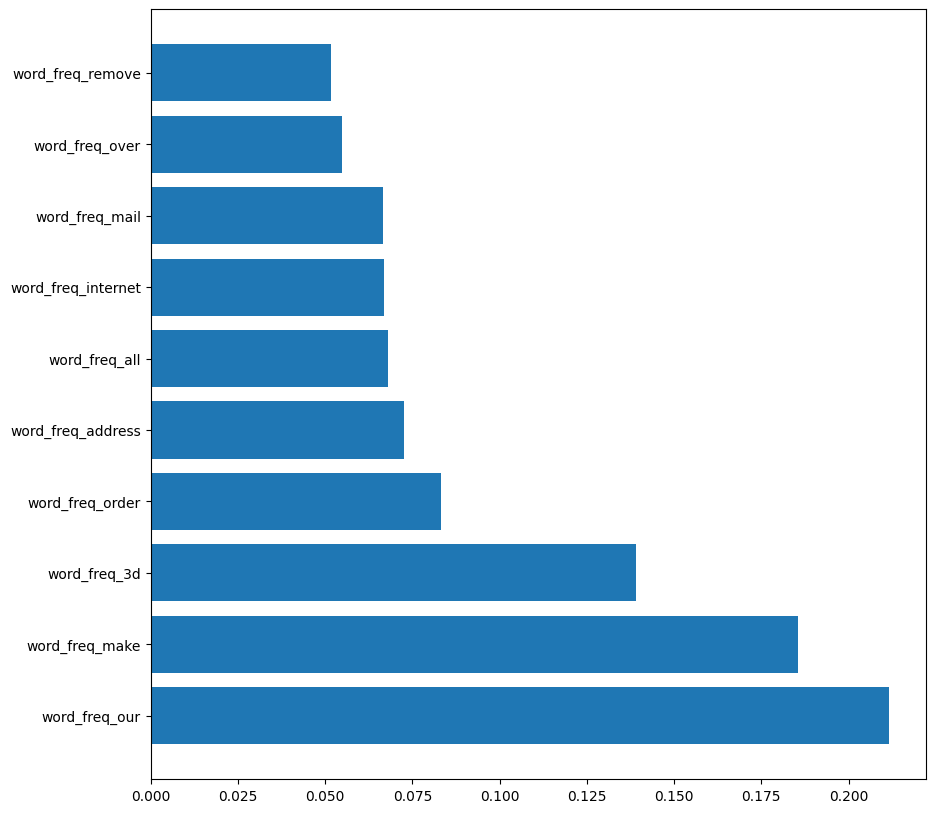

In [13]:

#Plot the feature importance graph and make it horizontal
plt.figure(figsize=(10, 10))
plt.barh(names[important_features], feature_importance[important_features])
plt.show()


In [14]:
#Create Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
#Making predictions
y_pred = dtree.predict(X_test)

In [18]:
#Accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Accuracy score: %.2f" % accuracy_score(y_test, y_pred))
print("R^2: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.13
Accuracy score: 0.87
R^2: 0.49
